### Seleção de casos

### Caso 2 - Caso de empresa de suprimentos de escritorio, efetividade de vendas e marketing

Descritivo - Cenário de uma empresa de venda de materiais de suprimentos de escritório (Móveis para escritório, Equipamentos de informática e Material de Escritório) chamada Office Corp.

- A empresa quer medir a efetividade de suas operações de marketing e vendas, e para isto realizou uma pesquisa de telemarketing endereçada a clientes empresariais nacionais com uma seleção aleatória de produtos, com 16.172 clientes. Os produtos que foram incluidos na pesquisa são: Mesa, Cadeira Executiva, Cadeira Padrão, Monitor, Impressora de Computador, Seguros, Toner e Material de Escritório.

- A Office Corp gostaria de aproveitar o conhecimento adquirido com esta pesquisa (e o conjunto de dados associado) para campanhas futuras. A Office Corp contratou uma equipe de analistas para analisar três problemas a seguir usando várias técnicas analíticas.

- Solução de três problemas:

        1 - Problema de Classificação (predição de comprar ou não comprar)
        2 - Problema de Regressão (predição do tamanho da compra que poderá ser feita)
        3 - Problema de Clusterização (Predição dos 3 principais produtos que a empresa possa vender mais).

Este estudo foi desenvolvido no curso de pós-graduação da GATECH - Georgia Tech, no curso "OMSA-Data Mining and Statistical Learning", 2021, pelos alunos Sushil Dudani, Tirthajyoti Sarkar e Vivek Sathe.
    - https://www.analytics.gatech.edu/

O estudo abrangeu a etapa de análise visual, preparação de dados, definição de amostra otima para pesquisas futuras e uso de métodos de IA para responder aos problemas apresentados.

Para fins de delimitação foi utilizado somente o estudo envolvendo a aplicação dos métodos.

Foram utilizados os seguintes classificadores:
 
 - Logistic Regression,
 - K-Neighbors
 - Linear SVM
 - RBF SVM
 - Decision Tree
 - Random Forest
 - Neural Net
 - AdaBoost
 - Bagging
 - Naive Bayes
 - Quadratic Discriminant Analysis - QDA

#### 0 - Bibliotecas

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib as mpl
mpl.rcParams['figure.dpi']=125

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#### 1 - Base de Dados

In [137]:
df = pd.read_csv("AddedFeatures_campaign_sale.csv")

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132 entries, 0 to 12131
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Index                              12132 non-null  int64  
 1   Campaign Period Sales              12132 non-null  float64
 2   Buy                                12132 non-null  int64  
 3   Historical Sales Volume            12132 non-null  float64
 4   Number of Prior Year Transactions  12132 non-null  int64  
 5   Number of Transactions             12132 non-null  int64  
 6   Purchase Breadth                   12132 non-null  int64  
 7   Customer_engagement_days           12132 non-null  int64  
 8   Days_since_last_transaction        12132 non-null  int64  
 9   Customer_engagement_length         12132 non-null  object 
 10  Language_group                     12132 non-null  object 
 11  Repurchase Method                  12132 non-null  obj

In [139]:
df.drop(['Index'],axis=1,inplace=True)

In [140]:
df.columns

Index(['Campaign Period Sales', 'Buy', 'Historical Sales Volume',
       'Number of Prior Year Transactions', 'Number of Transactions',
       'Purchase Breadth', 'Customer_engagement_days',
       'Days_since_last_transaction', 'Customer_engagement_length',
       'Language_group', 'Repurchase Method', 'Last Transaction Channel',
       'Number of Employees', 'Service Level', 'Do No Disturb',
       'Email Available', 'Desk', 'Executive Chair', 'Standard Chair',
       'Monitor', 'Printer', 'Computer', 'Insurance', 'Toner',
       'Office Supplies'],
      dtype='object')

In [141]:
cat_vars = ['Customer_engagement_length',
       'Language_group', 'Repurchase Method', 'Last Transaction Channel',
       'Number of Employees', 'Service Level', 'Do No Disturb',
       'Email Available', 'Desk', 'Executive Chair', 'Standard Chair',
       'Monitor', 'Printer', 'Computer', 'Insurance', 'Toner',
       'Office Supplies']

In [142]:
d=pd.get_dummies(df,columns=cat_vars)

In [143]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132 entries, 0 to 12131
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Campaign Period Sales                    12132 non-null  float64
 1   Buy                                      12132 non-null  int64  
 2   Historical Sales Volume                  12132 non-null  float64
 3   Number of Prior Year Transactions        12132 non-null  int64  
 4   Number of Transactions                   12132 non-null  int64  
 5   Purchase Breadth                         12132 non-null  int64  
 6   Customer_engagement_days                 12132 non-null  int64  
 7   Days_since_last_transaction              12132 non-null  int64  
 8   Customer_engagement_length_Long-term     12132 non-null  uint8  
 9   Customer_engagement_length_Mid-term      12132 non-null  uint8  
 10  Customer_engagement_length_Short-term    12132

## 2 - Classificação

In [144]:
names = ["Logistic Regression","Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Bagging",
         "Naive Bayes", "QDA"]

### 2.1 - Lista de classificadores (Scikit-learn com configurações de hiperparamemetros)

In [145]:
classifiers = [
    LogisticRegression(C=0.1,n_jobs=-1),
    KNeighborsClassifier(10,n_jobs=-1),
    SVC(kernel="linear", C=0.1),
    SVC(gamma='scale', C=1),
    DecisionTreeClassifier(max_depth=10,min_samples_leaf=10),
    RandomForestClassifier(max_depth=3, n_estimators=50, 
                           max_features=5,min_samples_leaf=10,n_jobs=-1),
    MLPClassifier(hidden_layer_sizes=(100,100),alpha=0.2, 
                  max_iter=200,learning_rate_init=0.01,learning_rate='adaptive',
                 early_stopping=True,validation_fraction=0.2),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                       n_estimators=50,learning_rate=0.1),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                       n_estimators=50, max_features=5,n_jobs=-1),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(reg_param=0.1)]

### 2.2 - Conjunto de teste/treino

In [146]:
X = d.drop(['Campaign Period Sales','Buy'],axis=1)
y = d['Buy']

In [147]:
TEST_FRAC = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=TEST_FRAC, 
                                                    random_state=7406)

In [148]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### 2.3 - Processamento de fitting de cada classificador individualmente

In [149]:
for name, clf in zip(names, classifiers):
    t1 = time.time()
    clf.fit(X_train, y_train)
    t2 = time.time()
    delta_t = round((t2-t1)*1000,3)
    score = round(clf.score(X_test, y_test),3)
    print(f"Fitting with {name} took {delta_t} ms.\n Score: {score}")
    print("-"*75)

Fitting with Logistic Regression took 14123.927 ms.
 Score: 0.802
---------------------------------------------------------------------------
Fitting with Nearest Neighbors took 6.898 ms.
 Score: 0.786
---------------------------------------------------------------------------
Fitting with Linear SVM took 3372.491 ms.
 Score: 0.801
---------------------------------------------------------------------------
Fitting with RBF SVM took 8664.834 ms.
 Score: 0.8
---------------------------------------------------------------------------
Fitting with Decision Tree took 96.605 ms.
 Score: 0.817
---------------------------------------------------------------------------
Fitting with Random Forest took 176.621 ms.
 Score: 0.803
---------------------------------------------------------------------------
Fitting with Neural Net took 1424.95 ms.
 Score: 0.801
---------------------------------------------------------------------------
Fitting with AdaBoost took 2060.509 ms.
 Score: 0.836
-----------

### 2.4 - Função para rodar os classificadores repetidamente

In [150]:
def run_classifiers(clf_lst,names=None,num_runs=10, verbose=0):
    """
    Runs the list of classifiers for a fixed number of times
    """
    if names is None:
        names = [str(type(c)).split('.')[-1][:-2] for c in clf_lst]
    scores = dict.fromkeys(names,[])
    f1_scores = dict.fromkeys(names,[])
    runtimes = dict.fromkeys(names,[])
    for name, clf in zip(names, clf_lst):
        sc,f1,rt= [],[],[]
        for i in range(num_runs):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_FRAC,)
            X_train = StandardScaler().fit_transform(X_train)
            X_test = StandardScaler().fit_transform(X_test)
            t1 = time.time()
            clf.fit(X_train, y_train)
            t2 = time.time()
            delta_t = round((t2-t1)*1000,3)
            score = round(clf.score(X_test, y_test),3)
            f1score = f1_score(y_test,clf.predict(X_test))
            sc.append(score)
            f1.append(f1score)
            rt.append(delta_t)
        sc = np.array(sc)
        f1 = np.array(f1)
        rt = np.array(rt)
        scores[name] = sc
        f1_scores[name] = f1
        runtimes[name] = rt
        if verbose:
            print(f"Finished {num_runs} runs for {name} algorithm")
            print("-"*75)
    # Convert to DataFrame
    df_scores = pd.DataFrame(scores)
    df_f1scores = pd.DataFrame(f1_scores)
    df_runtimes = pd.DataFrame(runtimes)
    
    return df_scores, df_f1scores,df_runtimes

### 2.5 - Rodando os classificadores repetidamente

In [151]:
d1,d2,d3 = run_classifiers(clf_lst=classifiers,
                           names=names,
                           num_runs=25,
                           verbose=1)

Finished 25 runs for Logistic Regression algorithm
---------------------------------------------------------------------------
Finished 25 runs for Nearest Neighbors algorithm
---------------------------------------------------------------------------
Finished 25 runs for Linear SVM algorithm
---------------------------------------------------------------------------
Finished 25 runs for RBF SVM algorithm
---------------------------------------------------------------------------
Finished 25 runs for Decision Tree algorithm
---------------------------------------------------------------------------
Finished 25 runs for Random Forest algorithm
---------------------------------------------------------------------------
Finished 25 runs for Neural Net algorithm
---------------------------------------------------------------------------
Finished 25 runs for AdaBoost algorithm
---------------------------------------------------------------------------
Finished 25 runs for Bagging algorithm


#### 2.5.1 - Resultados ao rodar os classificadores 25 vezes

In [152]:
d1

,Logistic Regression,Nearest Neighbors,Linear SVM,RBF SVM,Decision Tree,Random Forest,Neural Net,AdaBoost,Bagging,Naive Bayes,QDA
0,0.810,0.792,0.807,0.799,0.818,0.785,0.807,0.807,0.737,0.797,0.792
1,0.812,0.797,0.808,0.808,0.836,0.809,0.814,0.859,0.732,0.802,0.810
2,0.811,0.787,0.820,0.787,0.823,0.799,0.800,0.859,0.730,0.796,0.791
3,0.817,0.788,0.815,0.810,0.845,0.815,0.806,0.864,0.729,0.803,0.795
4,0.808,0.787,0.813,0.798,0.805,0.810,0.807,0.858,0.734,0.796,0.799
5,0.813,0.793,0.811,0.810,0.821,0.802,0.810,0.858,0.730,0.793,0.809
6,0.811,0.787,0.803,0.816,0.826,0.802,0.810,0.863,0.728,0.786,0.793
7,0.814,0.803,0.800,0.791,0.832,0.813,0.815,0.847,0.726,0.794,0.799
8,0.814,0.801,0.810,0.803,0.847,0.799,0.809,0.845,0.729,0.805,0.799
9,0.803,0.787,0.806,0.807,0.839,0.803,0.801,0.846,0.724,0.800,0.803


In [153]:
def plot_bars(d,
              t1="Mean accuracy score of algorithms",
              t2="Std.dev of the accuracy scores of algorithms"):
    """
    """
    fig,ax=plt.subplots(1,2,figsize=(14,5))
    ax[0].barh(y=list(d.columns),width=d.describe().T['mean'],height=0.6,color='goldenrod')
    ax[0].set_title(t1)
    ax[1].barh(y=list(d.columns),width=d.describe().T['std'],height=0.6,color='dodgerblue')
    ax[1].set_title(t2)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_color('#DDDDDD')
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['bottom'].set_color('#DDDDDD')
    plt.tight_layout(pad=1.5)
    plt.show()

In [154]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['xtick.labelsize']=13
mpl.rcParams['ytick.labelsize']=13
mpl.rcParams['figure.dpi']=125
mpl.rcParams['axes.titlesize']=18

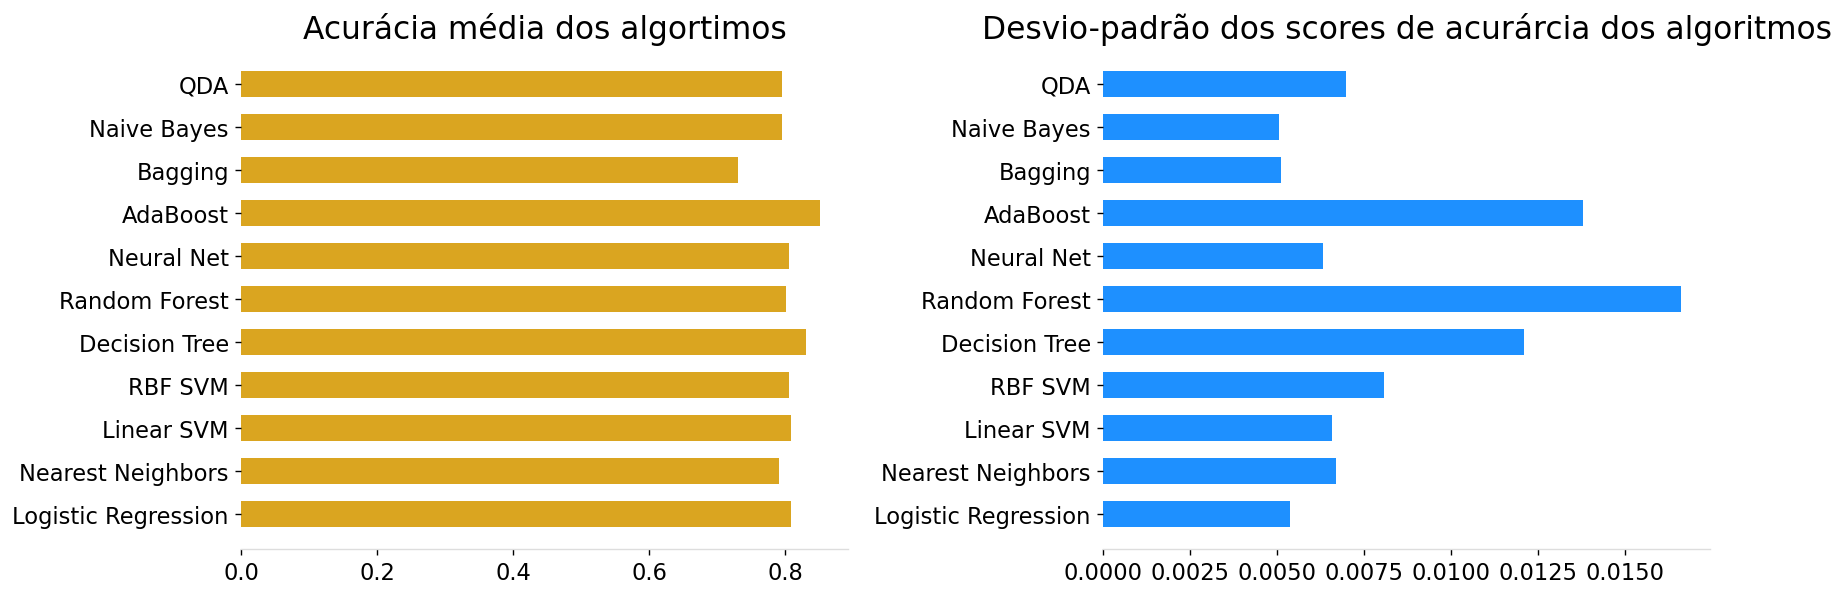

In [155]:
# Resultados visuais
plot_bars(d1,
          t1="Acurácia média dos algortimos",
          t2="Desvio-padrão dos scores de acurárcia dos algoritmos")

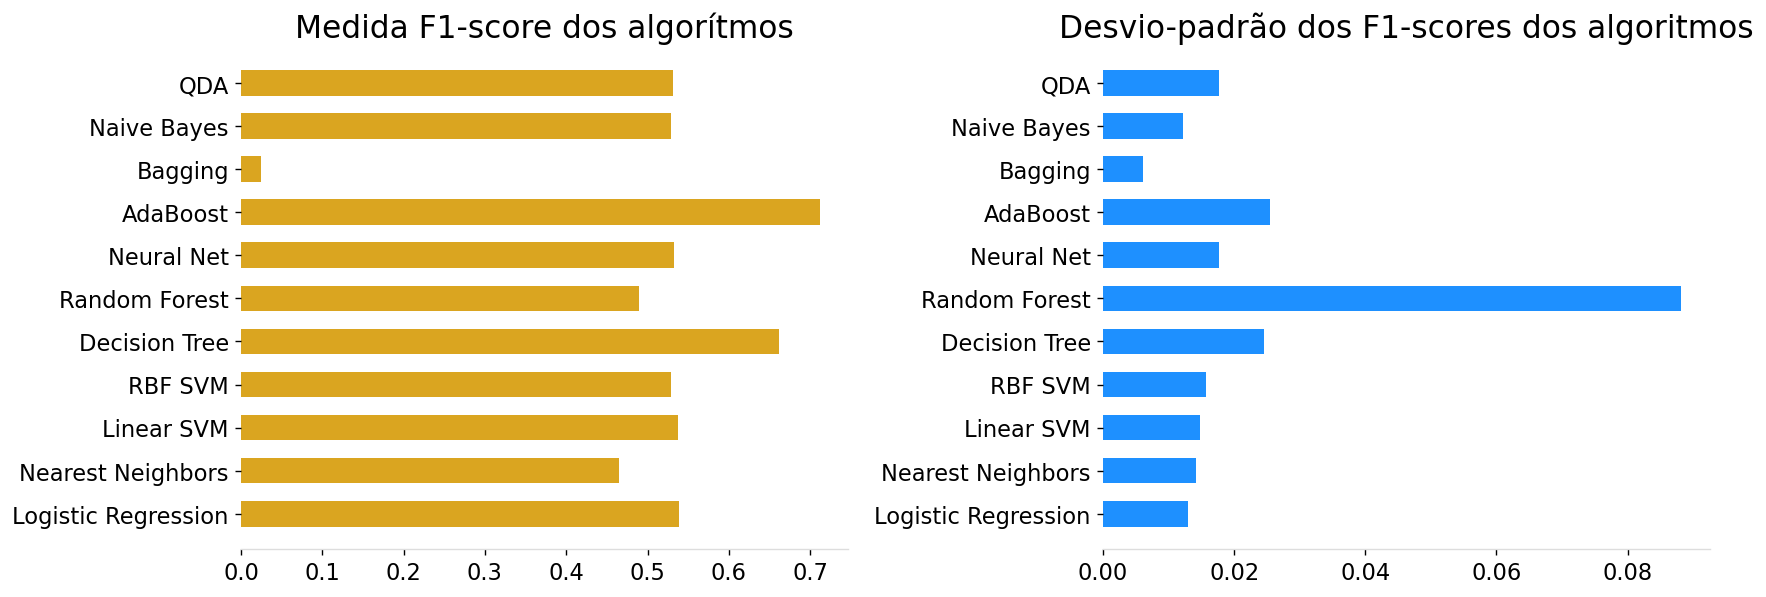

In [156]:
plot_bars(d2,
          t1="Medida F1-score dos algorítmos",
          t2="Desvio-padrão dos F1-scores dos algoritmos")

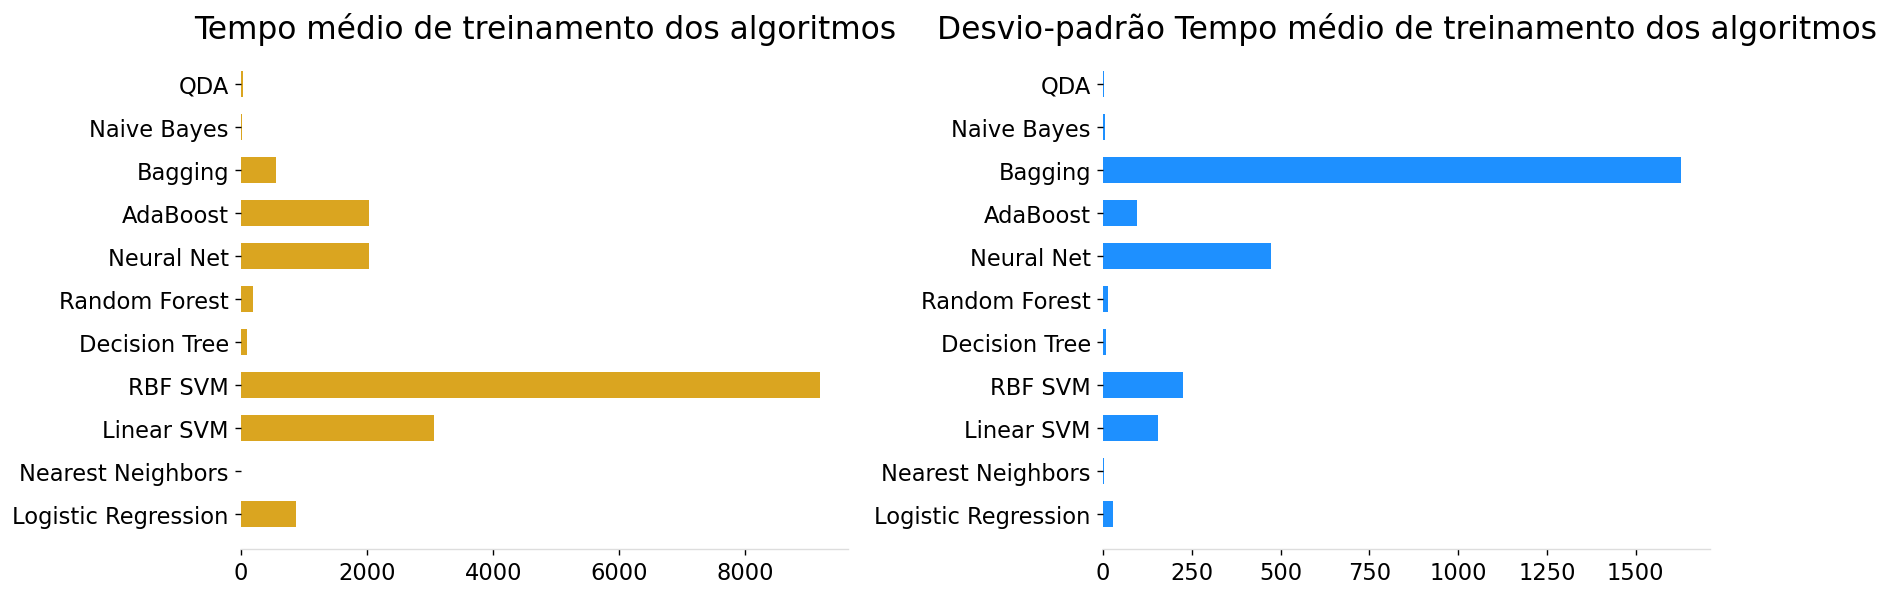

In [157]:
plot_bars(d3,
          t1="Tempo médio de treinamento dos algoritmos",
          t2="Desvio-padrão Tempo médio de treinamento dos algoritmos")

## 3 - Uso do Grid search

#### 3.1 - Grid search of `AdaBoost`

In [23]:
from sklearn.model_selection import GridSearchCV
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}
clf = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)

In [24]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8, 10],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='f1', verbose=3)

In [25]:
boost_grid=pd.DataFrame(clf.cv_results_['params'])

In [26]:
boost_grid['F1-score']=clf.cv_results_['mean_test_score']

In [27]:
boost_grid

,base_estimator__max_depth,base_estimator__min_samples_leaf,learning_rate,n_estimators,F1-score
0,2,5,0.01,10,0.539551
1,2,5,0.01,50,0.539191
2,2,5,0.01,250,0.729609
3,2,5,0.01,1000,0.732196
4,2,5,0.10,10,0.535068
...,...,...,...,...,...
75,10,10,0.01,1000,0.681574
76,10,10,0.10,10,0.694725
77,10,10,0.10,50,0.663803
78,10,10,0.10,250,0.681993


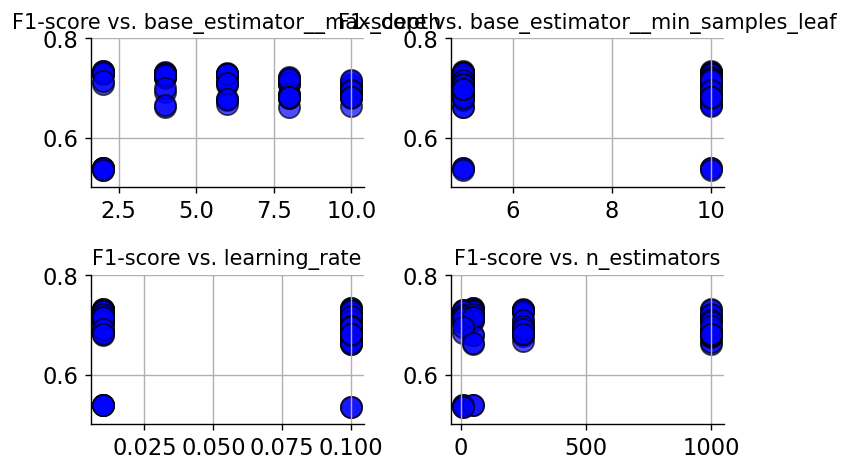

In [28]:
fig, ax = plt.subplots(2,2,figsize=(6,4))
ax= ax.ravel()
for i,c in enumerate(boost_grid.columns[:-1]):
    ax[i].scatter(boost_grid[c],boost_grid['F1-score'],
                 c='blue',edgecolor='k',alpha=0.7,s=150,
                 )
    ax[i].set_title(f"F1-score vs. {c}",fontsize=12)
    ax[i].set_ylim(0.5,0.8)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].grid(True)
plt.tight_layout(pad=1.5)
plt.show()

## 4 - TÉCNICAS DE REGRESSÃO

In [165]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

### 4.1 - Lista de regressores (Scikit-learn com hiperparamemetros)

In [166]:
reg_names = ["Linear regression","L1 (LASSO) regression","Ridge regression",
            "Support vector regression","Decision tree regression",
            "Random forest regression","Neural network regression"]

In [167]:
regressors = [LinearRegression(n_jobs=-1),
              Lasso(alpha=0.1),
              Ridge(alpha=0.1),
              SVR(kernel='poly',degree=3),
              DecisionTreeRegressor(max_depth=10,min_samples_leaf=10),
              RandomForestRegressor(max_depth=3, n_estimators=50, 
                           max_features=5,min_samples_leaf=10,n_jobs=-1),
              MLPRegressor(hidden_layer_sizes=(100,100),alpha=0.2, 
                  max_iter=200,learning_rate_init=0.01,learning_rate='adaptive',
                 early_stopping=True,validation_fraction=0.2)]

### 4.2 - Separação de dados em teste/treino para as regressões

In [168]:
d_reg= d[d['Campaign Period Sales']>0.0]

In [169]:
X = d_reg.drop(['Campaign Period Sales','Buy'],axis=1)
y = d_reg['Campaign Period Sales']

### 4.3 - Função para rodar classificadores repetidamente

In [170]:
def run_regressors(reg_lst,names=None,num_runs=10, verbose=0):
    """
    Runs the list of regressors for a fixed number of times
    """
    if names is None:
        names = [str(type(c)).split('.')[-1][:-2] for c in reg_lst]
    scores = dict.fromkeys(names,[])
    runtimes = dict.fromkeys(names,[])
    for name, reg in zip(names, reg_lst):
        sc,rt= [],[]
        for i in range(num_runs):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_FRAC,)
            X_train = StandardScaler().fit_transform(X_train)
            X_test = StandardScaler().fit_transform(X_test)
            t1 = time.time()
            reg.fit(X_train, y_train)
            t2 = time.time()
            delta_t = round((t2-t1)*1000,3)
            #rmse = round(np.sqrt(np.mean((reg.predict(X_test)-y_test)**2).mean()),3)
            rmse = round(np.sqrt(np.mean((reg.predict(X_test)-y_test)**2)),3)
            sc.append(rmse)
            rt.append(delta_t)
        sc = np.array(sc)
        rt = np.array(rt)
        scores[name] = sc
        runtimes[name] = rt
        if verbose:
            print(f"Finished {num_runs} runs for {name} algorithm")
            print("-"*75)
    # Convert to DataFrame
    df_scores = pd.DataFrame(scores)
    df_runtimes = pd.DataFrame(runtimes)
    
    return df_scores,df_runtimes

### 4.4 - Rodando os regressores repetidamente

In [171]:
d1_reg, d2_reg = run_regressors(reg_lst=regressors,names=reg_names,num_runs=25,verbose=1)

Finished 25 runs for Linear regression algorithm
---------------------------------------------------------------------------
Finished 25 runs for L1 (LASSO) regression algorithm
---------------------------------------------------------------------------
Finished 25 runs for Ridge regression algorithm
---------------------------------------------------------------------------
Finished 25 runs for Support vector regression algorithm
---------------------------------------------------------------------------
Finished 25 runs for Decision tree regression algorithm
---------------------------------------------------------------------------
Finished 25 runs for Random forest regression algorithm
---------------------------------------------------------------------------
Finished 25 runs for Neural network regression algorithm
---------------------------------------------------------------------------


#### 4.4.1 - Resultados ao rodar os regressores 25 vezes

In [172]:
d1_reg

,Linear regression,L1 (LASSO) regression,Ridge regression,Support vector regression,Decision tree regression,Random forest regression,Neural network regression
0,1.062257e+14,170.678,123.444,308.012,158.425,342.029,139.569
1,1.932630e+14,178.285,148.575,359.927,139.570,274.659,148.593
2,3.440234e+13,163.066,135.038,423.513,127.027,281.707,131.052
3,8.378818e+12,122.281,120.472,345.329,148.869,300.301,153.336
4,5.923698e+13,108.485,147.460,282.422,103.562,241.748,184.376
5,1.517524e+14,118.019,141.976,400.737,113.269,248.039,145.502
6,1.544159e+14,164.303,134.550,360.651,105.194,259.457,100.634
7,3.974291e+13,175.634,152.889,353.108,99.793,272.394,197.823
8,1.668326e+14,168.313,134.082,310.276,141.768,282.818,87.519
9,2.163411e+14,129.874,132.959,383.674,71.856,242.393,136.179


In [173]:
d1_reg1 = d1_reg.drop(['Linear regression'],axis=1)

In [174]:
d1_reg1['Neural network regression'].mean()

135.18024

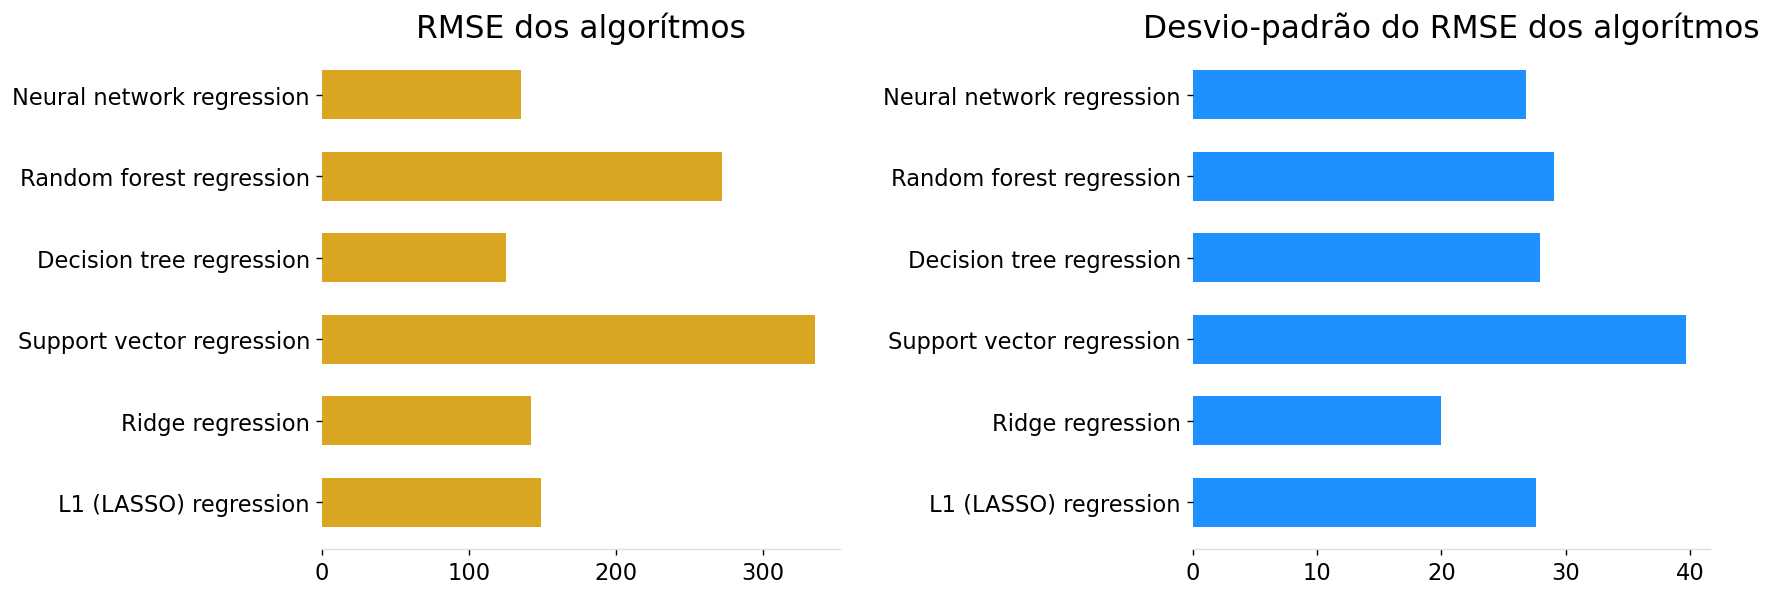

In [175]:
plot_bars(d1_reg1,
          t1="RMSE dos algorítmos",
          t2="Desvio-padrão do RMSE dos algorítmos")

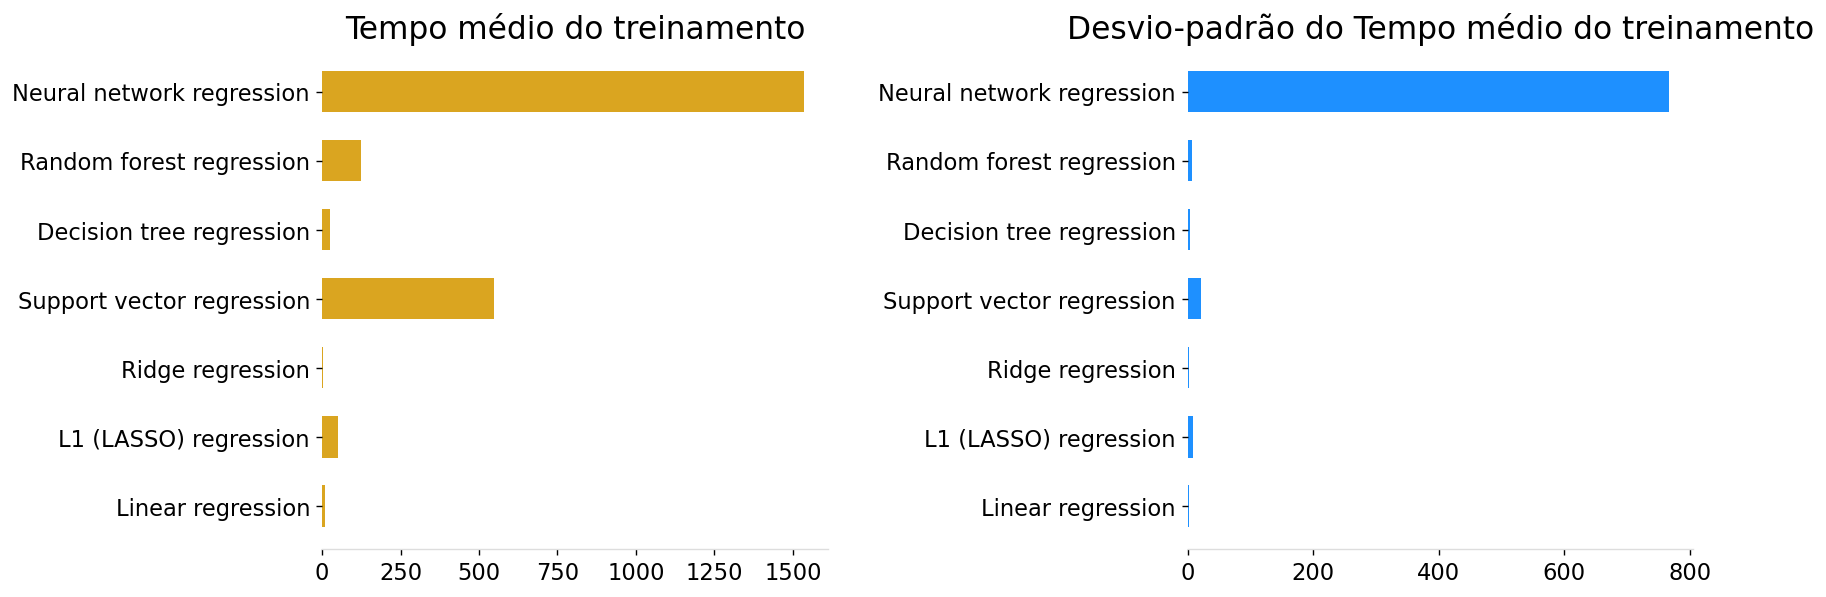

In [176]:
plot_bars(d2_reg,
          t1="Tempo médio do treinamento",
          t2="Desvio-padrão do Tempo médio do treinamento")

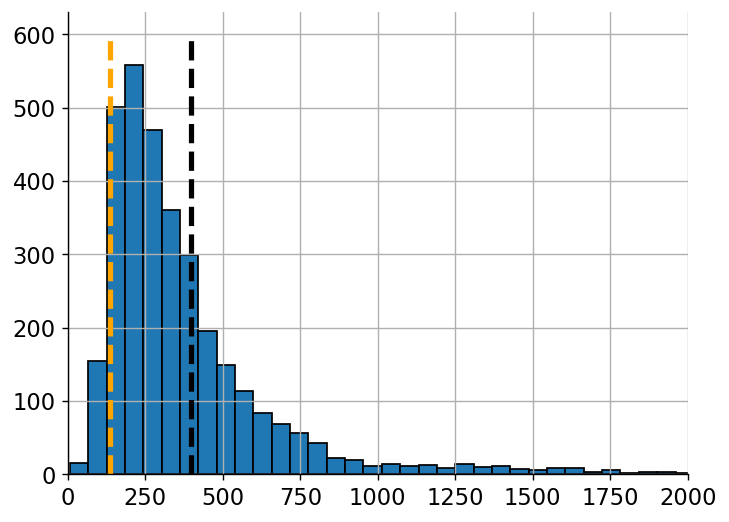

In [177]:
fig, ax = plt.subplots()
plt.hist(y,bins=100,edgecolor='k')
plt.xlim(0,2000)
plt.vlines(x=398,ymin=0,ymax=600,color='k',linestyle='--',linewidth=3)
plt.vlines(x=d1_reg1['Neural network regression'].mean(),
           ymin=0,ymax=600,color='orange',linestyle='--',linewidth=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True)
plt.show()

### Previsão de regressão e gráfico de correspondência de ground truth

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_FRAC,)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
nn_reg = MLPRegressor(hidden_layer_sizes=(100,100),alpha=0.2, 
                  max_iter=200,learning_rate_init=0.01,learning_rate='adaptive',
                 early_stopping=True,validation_fraction=0.2)
nn_reg.fit(X_train,y_train)
preds = nn_reg.predict(X_test)

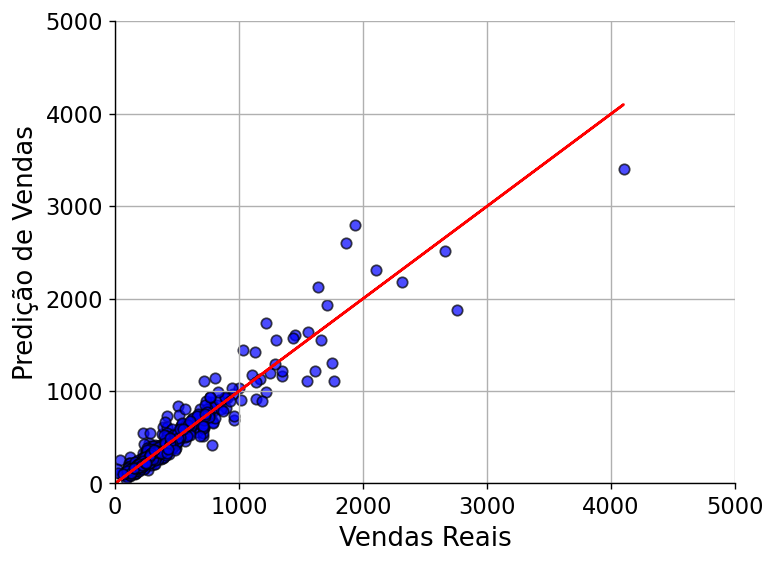

In [179]:
fig, ax = plt.subplots()
plt.scatter(x=y_test,y=preds,edgecolor='k',alpha=0.7,c='blue')
plt.plot(y_test,y_test,c='red')
plt.xlim(0,5000)
plt.ylim(0,5000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True)
plt.xlabel("Vendas Reais",fontsize=15)
plt.ylabel("Predição de Vendas",fontsize=15)
plt.show()

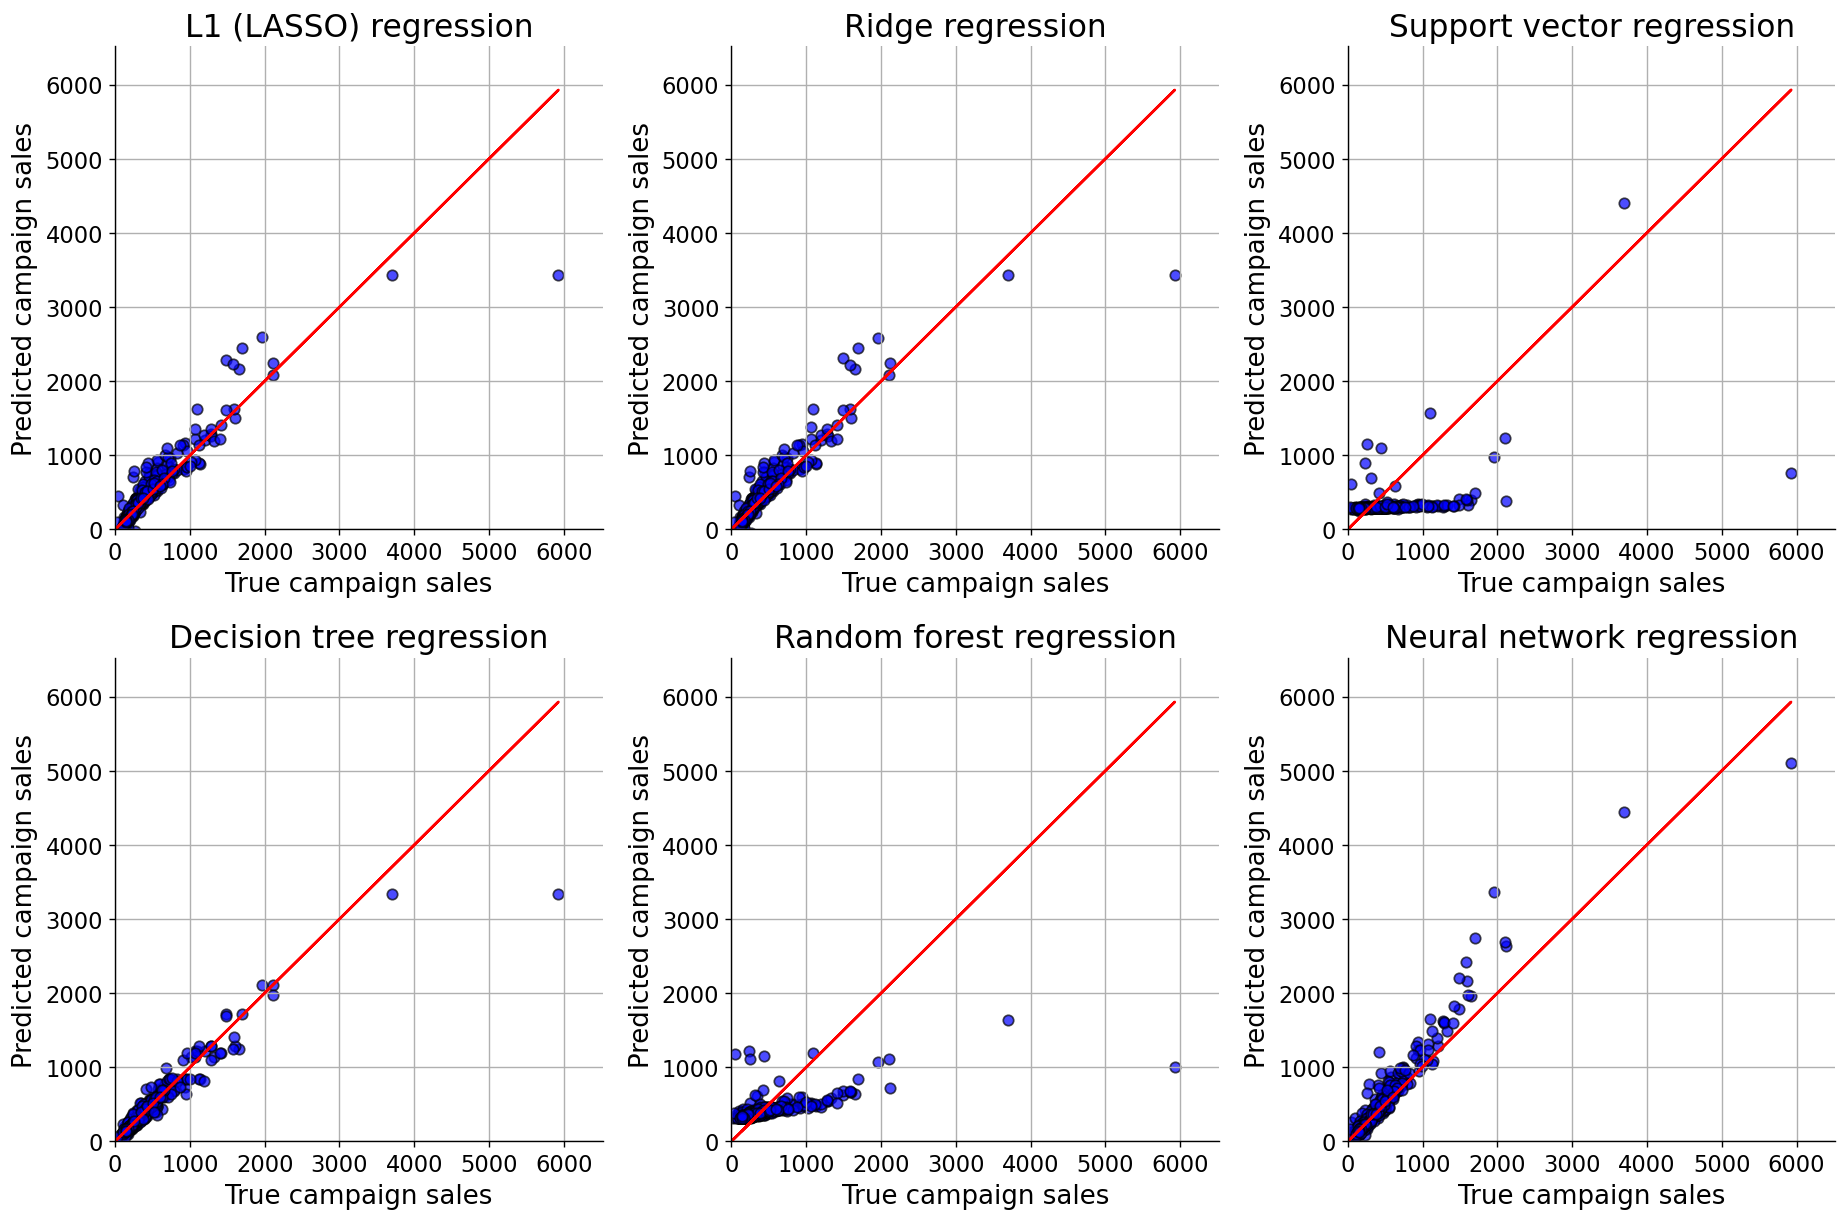

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_FRAC,)
xlim = y_test.max()
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

fig, ax = plt.subplots(2,3,figsize=(15,10))
ax= ax.ravel()
for i in range(6):
    reg = regressors[1:][i]
    reg.fit(X_train,y_train)
    preds = reg.predict(X_test)
    ax[i].scatter(x=y_test,y=preds,edgecolor='k',alpha=0.7,c='blue')
    ax[i].plot(y_test,y_test,c='red')
    ax[i].set_xlim(0,xlim*1.1)
    ax[i].set_ylim(0,xlim*1.1)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].grid(True)
    ax[i].set_xlabel("True campaign sales",fontsize=15)
    ax[i].set_ylabel("Predicted campaign sales",fontsize=15)
    ax[i].set_title(reg_names[1:][i])
plt.tight_layout(pad=1.5)
plt.show()

### 5 - Problema de Clusterização 

#### Ajuste do modelo NN para regressão

In [118]:
no_neurons = [i*10 for i in range(1,11)]
alpha = [0.01,0.1,0.2,0.5]
learning_rate = [0.01,0.05,0.1]
activation = ['relu','tanh','logistic']

In [119]:
nn_grid = {'neurons':[],'alpha':[],'learning_rate':[],'activation':[],'RMSE':[],'training-time':[]}

In [120]:
nn_grid

{'neurons': [],
 'alpha': [],
 'learning_rate': [],
 'activation': [],
 'RMSE': [],
 'training-time': []}

In [121]:
X = d_reg.drop(['Campaign Period Sales','Buy'],axis=1)
y = d_reg['Campaign Period Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=TEST_FRAC, 
                                                    random_state=7406)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [123]:
from tqdm import tqdm

for n in tqdm(no_neurons):
    for a in tqdm(alpha):
        for l in learning_rate:
            for act in activation:
                reg = MLPRegressor(hidden_layer_sizes=(n,n),alpha=a,activation=act, 
                  max_iter=200,learning_rate_init=l,learning_rate='adaptive',
                 early_stopping=True,validation_fraction=0.2)
                t1 = time.time()
                reg.fit(X_train, y_train)
                t2 = time.time()
                delta_t = round((t2-t1)*1000,3)
                #rmse = round(np.sqrt(np.mean((reg.predict(X_test)-y_test)**2).mean()),3)
                rmse = round(np.sqrt(np.mean((reg.predict(X_test)-y_test)**2)),3)
                nn_grid['neurons'].append(n)
                nn_grid['alpha'].append(a)
                nn_grid['learning_rate'].append(l)
                nn_grid['activation'].append(act)
                nn_grid['RMSE'].append(rmse)
                nn_grid['training-time'].append(delta_t)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [14:20<00:00, 86.06s/it]


In [124]:
nn_grid=pd.DataFrame(nn_grid)

In [125]:
nn_grid.shape

(360, 6)

In [126]:
nn_grid.head()

,neurons,alpha,learning_rate,activation,RMSE,training-time
0,10,0.01,0.01,relu,117.774,1630.071
1,10,0.01,0.01,tanh,348.726,2090.093
2,10,0.01,0.01,logistic,348.137,1840.064
3,10,0.01,0.05,relu,114.237,166.304
4,10,0.01,0.05,tanh,193.307,2169.028


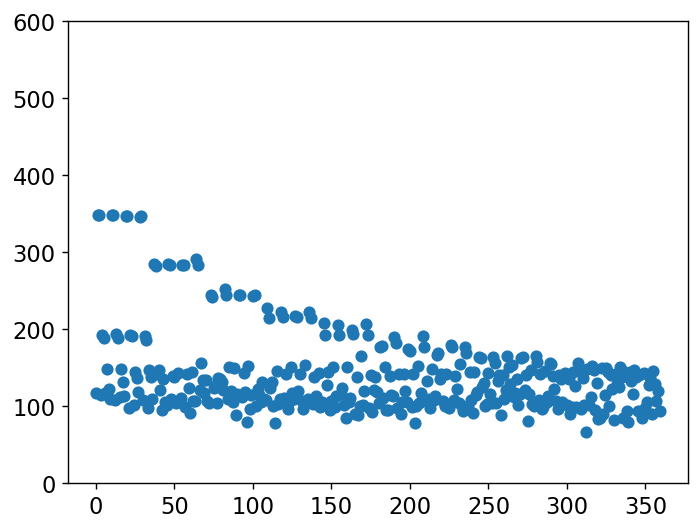

In [127]:
plt.scatter(x=[i for i in range(len(nn_grid))],y=nn_grid['RMSE'])
plt.ylim(0,600)
plt.show()

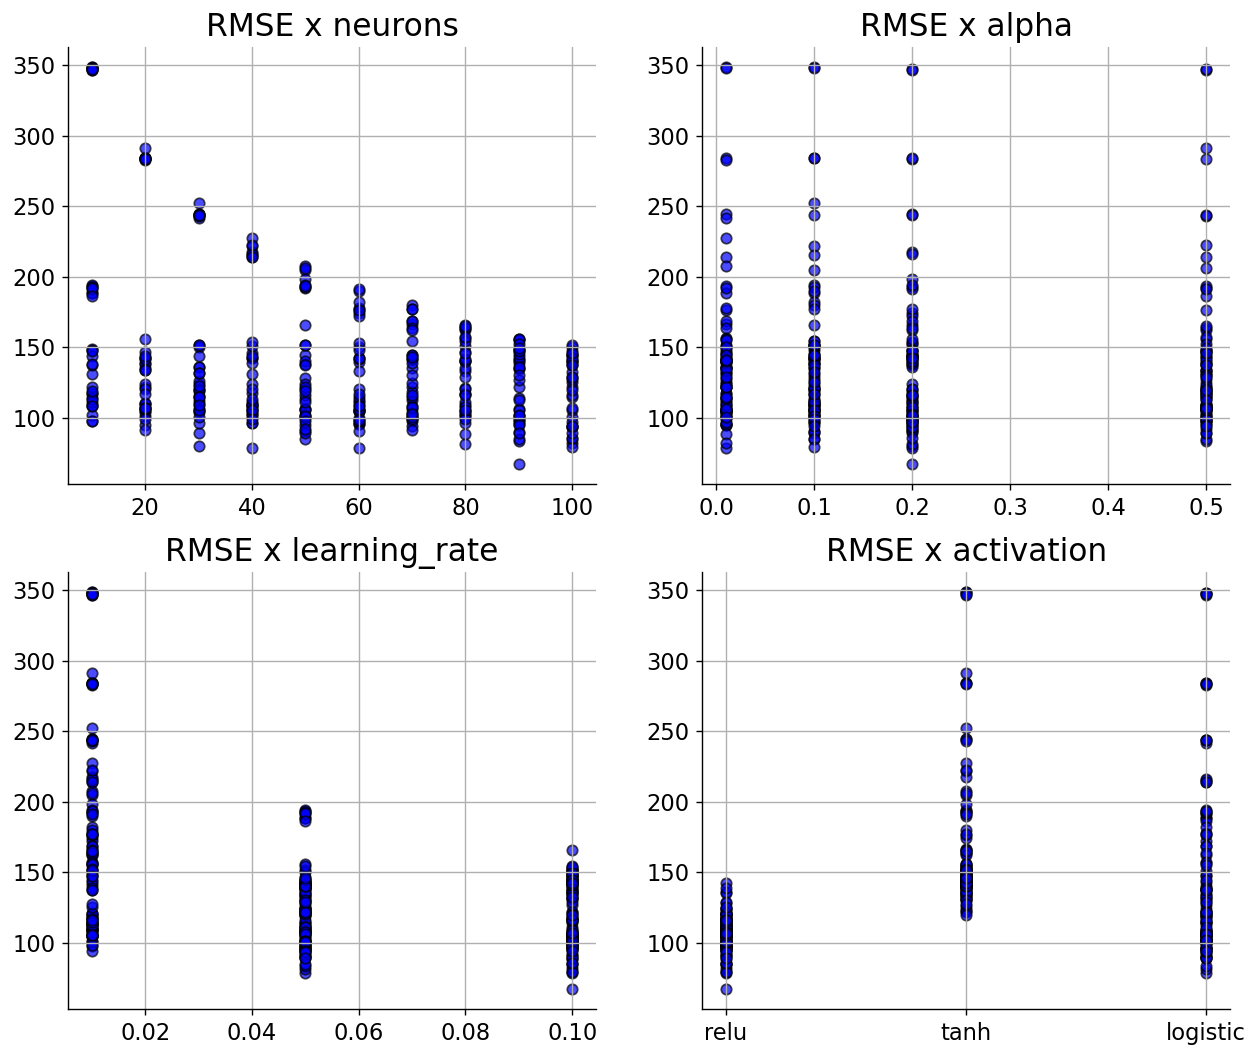

In [180]:
fig, ax = plt.subplots(2,2,figsize=(12,10))
ax= ax.ravel()
for i,c in enumerate(nn_grid.columns[:4]):
    ax[i].scatter(nn_grid[c],nn_grid['RMSE'],edgecolor='k',alpha=0.7,c='blue')
    ax[i].set_title(f"RMSE x {c}")
    ax[i].grid(True)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
plt.show()

## 6 - Sample complexity
A complexidade de amostra de um algoritmo de aprendizado de máquina representa o número de amostras de treinamento que ele precisa para aprender com êxito uma função de destino.

In [129]:
sample_complexity = dict.fromkeys(names,[])
frac = [0.1*i for i in range(1,11)]
for name,clf in list(zip(names,classifiers)):
    scores = []
    for f in frac:
        d_frac = d.sample(frac=f)
        X = d_frac.drop(['Campaign Period Sales','Buy'],axis=1)
        y = d_frac['Buy']
        TEST_FRAC = 0.2
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=TEST_FRAC,random_state=7406)
        X_train = StandardScaler().fit_transform(X_train)
        X_test = StandardScaler().fit_transform(X_test)
        t1 = time.time()
        clf.fit(X_train, y_train)
        t2 = time.time()
        delta_t = round((t2-t1)*1000,3)
        f1score = f1_score(y_test,clf.predict(X_test))
        scores.append(f1score)
    sample_complexity[name] = np.array(scores)
        #print(sample_complexity[name])
    print(f"Done for {name}")

Done for Logistic Regression
Done for Nearest Neighbors
Done for Linear SVM
Done for RBF SVM
Done for Decision Tree
Done for Random Forest
Done for Neural Net
Done for AdaBoost
Done for Bagging
Done for Naive Bayes
Done for QDA


In [130]:
sample_complexity=pd.DataFrame(sample_complexity)

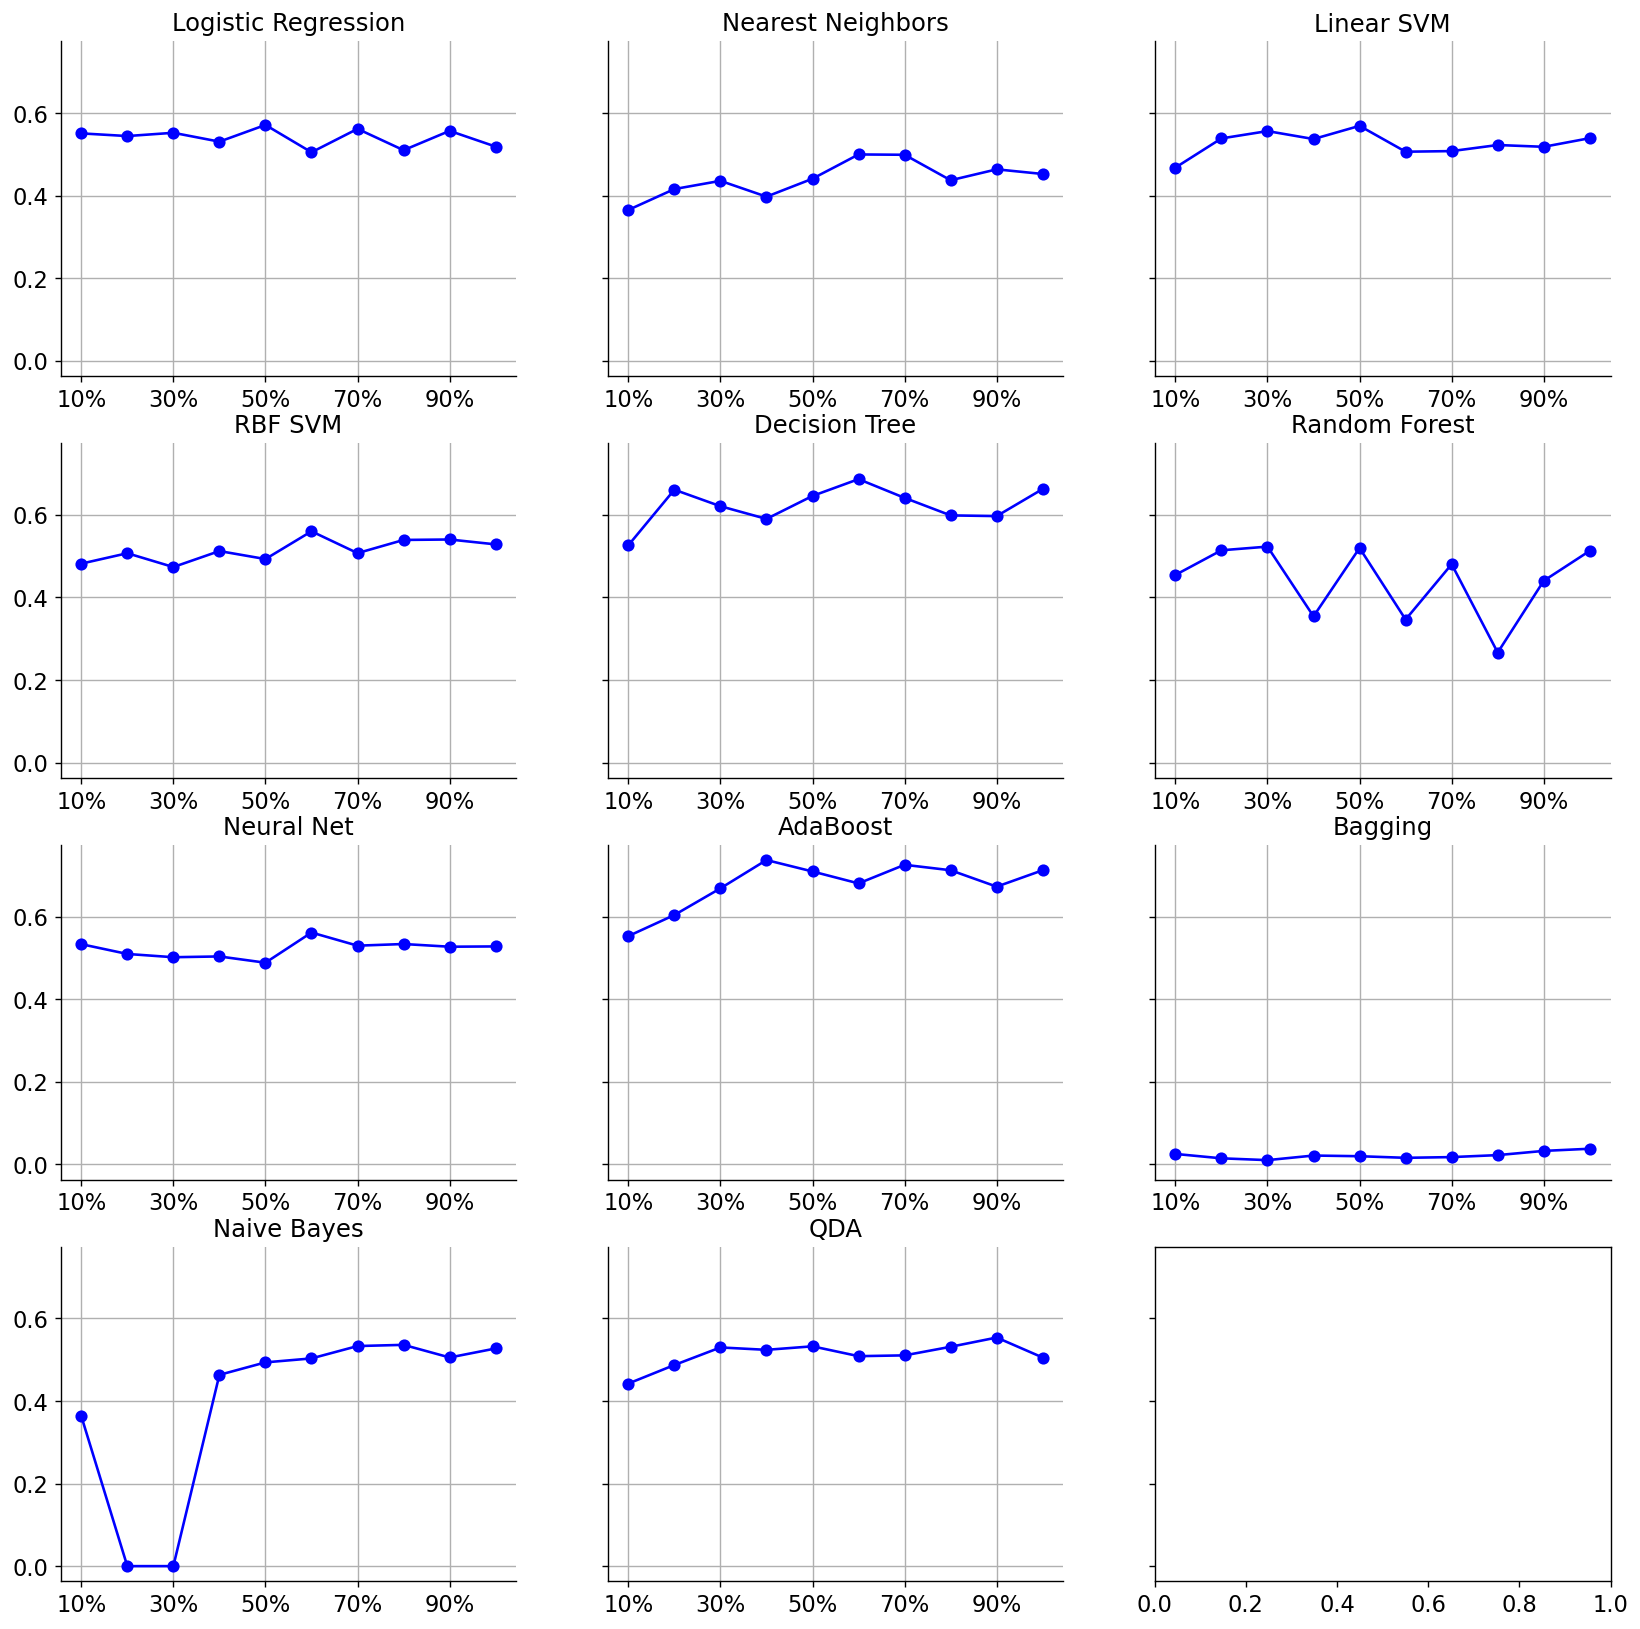

In [131]:
fig,ax = plt.subplots(4,3,figsize=(16,16),sharey=True)
ax = ax.ravel()
for i,c in enumerate(sample_complexity.columns):
    ax[i].plot([int(j) for j in range(1,11)],sample_complexity[c],marker='o',color='blue')
    ax[i].set_xticks([int(j) for j in range(1,11,2)])
    ax[i].set_xticklabels([str(10*j)+'%' for j in range(1,11,2)])
    ax[i].set_title(f"{c}",fontsize=14)
    ax[i].grid(True)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
plt.show()